In [67]:
try:
    import jax
    import jax.numpy as jnp
except:
    ModuleNotFoundError
    %pip install jax jaxlib
    import jax
    import jax.numpy as jnp


from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [96]:
df = sns.load_dataset("penguins")

In [97]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


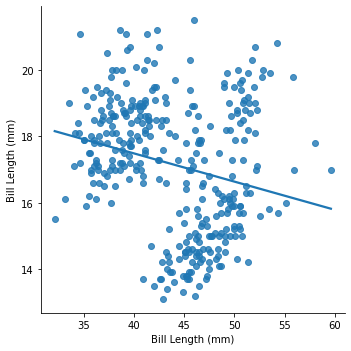

In [98]:
sns.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm", ci=1)
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.savefig("/Users/nipun/Desktop/overall_penguin.png", dpi=300)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

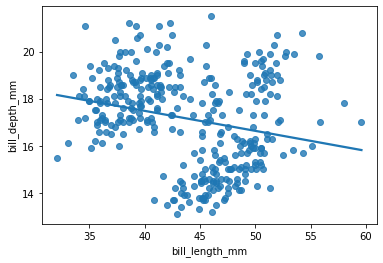

In [106]:
sns.regplot(data=df, x=xcol, y=ycol, ci=1)

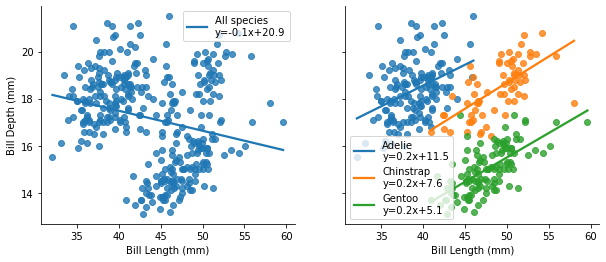

In [120]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
# Hint from: https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
xcol = "bill_length_mm"
ycol = "bill_depth_mm"

slope, intercept, r_value, p_value, std_err = stats.linregress(
    df[xcol].dropna(), df[ycol].dropna()
)

sns.regplot(
    x=xcol,
    y=ycol,
    data=df,
    line_kws={"label": f"All species\ny={slope:.1f}x+{intercept:.1f}"},
    ci=1,
    ax=ax[0],
)


for specie in df["species"].unique():
    subset_data = df[df.species == specie]
    subset_data = subset_data.dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        subset_data[xcol], subset_data[ycol]
    )

    sns.regplot(
        x=xcol,
        y=ycol,
        data=subset_data,
        line_kws={"label": f"{specie}\ny={slope:.1f}x+{intercept:.1f}"},
        ci=1,
        ax=ax[1],
    )

ax[1].set_ylabel("")
ax[0].set_xlabel("Bill Length (mm)")
ax[1].set_xlabel("Bill Length (mm)")
ax[0].set_ylabel("Bill Depth (mm)")


ax[0].legend()
ax[1].legend()


sns.despine()

In [119]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df[xcol].dropna(), df[ycol].dropna()
)

slope

-0.08502128077717656

In [92]:
subset_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


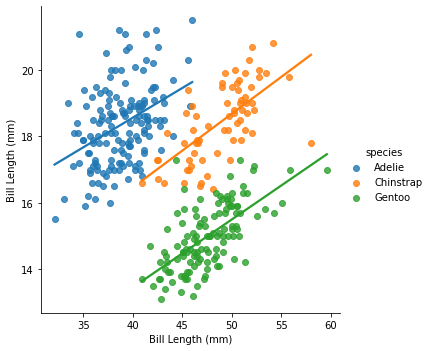

In [52]:
sns.lmplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    ci=1,
)
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.savefig("/Users/nipun/Desktop/group_penguin.png", dpi=300)

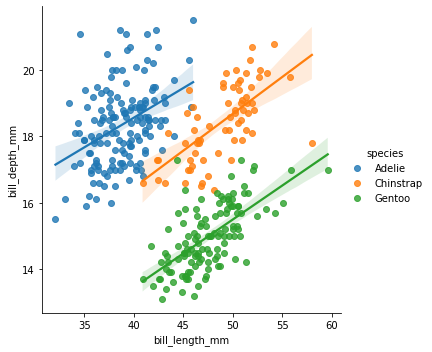

In [15]:
sns.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [84]:
df = sns.load_dataset("iris")

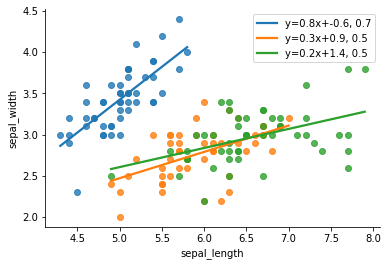

In [85]:
# Hint from: https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
xcol = "sepal_length"
ycol = "sepal_width"
for specie in df["species"].unique():
    subset_data = df[df.species == specie]
    subset_data = subset_data.dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        subset_data[xcol], subset_data[ycol]
    )

    sns.regplot(
        x=xcol,
        y=ycol,
        data=subset_data,
        line_kws={
            "label": "y={0:.1f}x+{1:.1f}, {2:0.1f}".format(slope, intercept, r_value)
        },
        ci=1,
    )
plt.legend()
sns.despine()

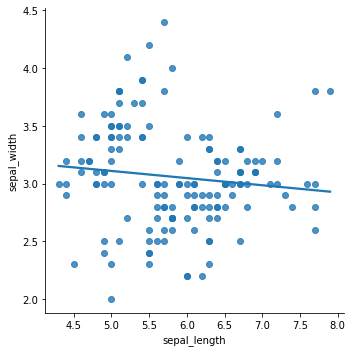

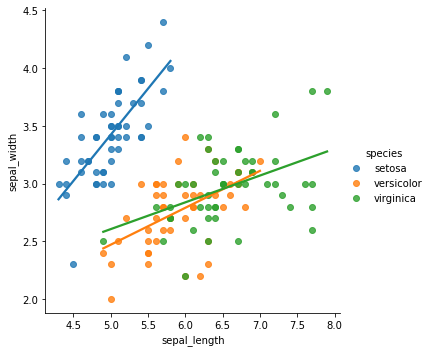

In [26]:
sns.lmplot(data=df, x="sepal_length", y="sepal_width", ci=1)
sns.lmplot(
    data=df,
    x="sepal_length",
    y="sepal_width",
    hue="species",
    ci=1,
)